# Forecasting House Price

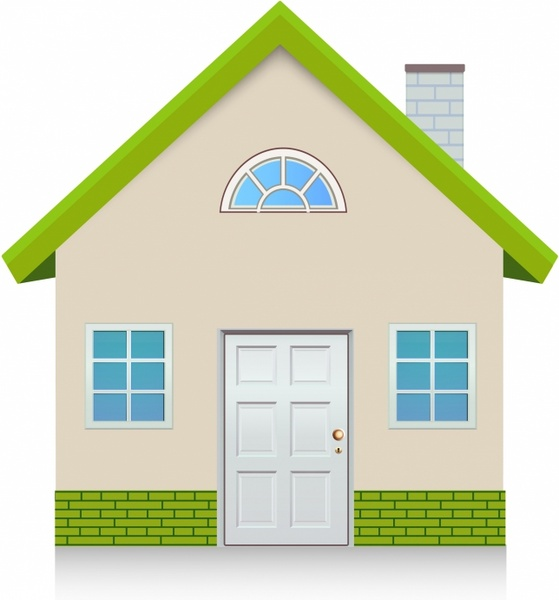

source : https://www.google.com/url?sa=i&url=https%3A%2F%2Fall-free-download.com%2Ffree-vector%2Fdownload%2Fgreen-house-icon_312519.html&psig=AOvVaw1ABAndYpxJunkdM63G-ohr&ust=1630213866211000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMDRpIP60vICFQAAAAAdAAAAABAY


## 👋💻 

### **Hi there!😄 I am new to data science and this is my try on the dataset. Feel free to comment if you have any questions, insights or advice on this or any data science related :) Thank you!**

### **Import Library & Packages**

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [186]:
train = pd.read_csv('../input/home-data-for-ml-course/train.csv')
test = pd.read_csv('../input/home-data-for-ml-course/test.csv')

id = test['Id']

## **Exploratory Data Analysis**

In [187]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [188]:
print('The train dataset have the shape', train.shape)
print('The test dataset have the shape', test.shape)


The train dataset have the shape (1460, 81)
The test dataset have the shape (1459, 80)


In [189]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [190]:
train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [191]:
print(train.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [192]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Here we know that our dataset contains only three type of data type which is int, float and object

**List of columns with int64 type**

In [193]:
list(train.select_dtypes(include=['int64']).columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

**List of columns with float type**

In [194]:
list(train.select_dtypes(include=['float64']).columns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

**List of columns with object type**

In [195]:
list(train.select_dtypes(include=['O']).columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### **Dropping Column** 

- the variable year and month sold can be considered irrelevant to the price of a house therefore i will drop them 
- Dropping id column for the data before feeding it to the model as it only serve its purpose as a unique identifier

In [196]:
train.drop(['Id','YrSold','MoSold'], inplace=True, axis=1)
test.drop(['Id','YrSold','MoSold'], inplace=True, axis=1)

#### **Handling Missing Values**

- Missing data will be a problem for our model and it will distort the findings and effect the quality of our machine learning model therefore handling missing values is crucial
- Ways that can be done to handle missing values are removing the rows or column with missing values and imputation (replacing missing values with mean/mode etc) 

In [197]:
train.isnull().mean().round(4).mul(100).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
TotalBsmtSF     0.00
Heating         0.00
MSZoning        0.00
CentralAir      0.00
SalePrice       0.00
Length: 78, dtype: float64

* Columns with more than 40% of values missing will be removed.

In [198]:
train = train.loc[:, train.isnull().mean() < .4]
test = test.loc[:, test.isnull().mean() < .4]

train.shape


(1460, 73)

In [199]:
print(train.isnull().sum().sort_values(ascending = False))

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
MSZoning          0
Heating           0
SalePrice         0
Length: 73, dtype: int64


* Not all column with missing values will be removed in our data
* We will impute numerical columns that have missing values with mean
* Categorical variables with mode
* One hot encoding the categorical variables

In [200]:
from sklearn.impute import SimpleImputer

#numerical variables
numerical_transformer = SimpleImputer(missing_values=np.NaN, strategy='mean')


#categorical variables
# Bundle preprocessing for numerical and categorical data
categorical_transformer =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### **Split train and validation set**

In [201]:
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']


X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


#### **Dealing with categorical/ordinal variables (Variables with Object DataType)**

- This dataset contains a lot of variables with object datatype 
- Having too many features is not good as it may lead to overfitting which makes our model tend to fit specifically to our training data
- Therefore, doing feature selection is important and since we have many object datatype column 
- Column with high cardinality which means having too many unique values will cause problem when it undergoes one hot encoding as it will be space consuming and may cause an increase in erro with the increase in the number of feature (curse of dimensionality)
- Therefore by removing/ aggregate column with high cardinality will help

In [202]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()
test =  test[my_cols].copy()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)
test = preprocessor.fit_transform(test)


### XGBoost

In [203]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [204]:
from sklearn import datasets, linear_model, metrics

# create xgboost object
#xgb =  XGBRegressor(n_estimators=1000,
                  #  learning_rate=0.05)

# Bundle preprocessing and modeling code in a pipeline

 

# train the model using the training sets
#my_pipeline.fit(X_train, y_train)


#predictions = my_pipeline.predict(test[my_cols].copy())
 

In [205]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 54665.61


In [206]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [207]:
params['eval_metric'] = "mae"


In [208]:
num_boost_round = 999


In [209]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:128048.17969
[1]	Test-mae:90451.69531
[2]	Test-mae:64437.21875
[3]	Test-mae:46924.41016
[4]	Test-mae:35907.57812
[5]	Test-mae:28651.66797
[6]	Test-mae:24358.02148
[7]	Test-mae:21345.20312
[8]	Test-mae:20609.62305
[9]	Test-mae:19858.33594
[10]	Test-mae:20004.07617
[11]	Test-mae:20490.37500
[12]	Test-mae:20595.72070
[13]	Test-mae:20728.72461
[14]	Test-mae:20804.92773
[15]	Test-mae:20832.74219
[16]	Test-mae:20483.95703
[17]	Test-mae:20433.59961
[18]	Test-mae:20338.75586
[19]	Test-mae:20395.87109
Best MAE: 19858.34 with 10 rounds


In [210]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:02] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,127486.459375,807.475322,127265.109375,3246.072883
1,90129.512500,572.687389,89995.176563,2738.500091
2,63935.870312,350.594070,64495.805469,2385.140270
3,45489.197656,276.848749,46871.721875,1978.922345
4,32584.100390,211.143132,35644.946094,1563.831719
5,23699.809766,114.992450,28477.155078,1209.771306
6,17750.991015,98.441939,24329.628516,887.714865
7,13948.970898,107.324550,21892.096875,725.399104
8,11538.960156,125.545307,20569.073437,638.013310
9,9998.693359,155.135243,19928.327734,632.687639


In [211]:
cv_results['test-mae-mean'].min()


18660.8375

In [212]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,12)
    for min_child_weight in range(1,8)
]

In [213]:
# Defin# initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=6, min_child_weight=1
[18:42:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18660.8371094 for 29 rounds
CV with max_depth=6, min_child_weight=2
[18:42:04] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:04] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:04] WARNING: ../src/objective/regression_obj.cu

In [214]:
params['max_depth'] = 8
params['min_child_weight'] = 7

In [215]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [216]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[18:43:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18473.7453124 for 32 rounds
CV with subsample=1.0, colsample=0.9
[18:43:10] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:10] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:10] WARNING: ../src/objective/regression_obj.cu:171: 

In [217]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [218]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[18:43:25] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:25] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:25] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:25] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:25] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 18473.745703 for 32 rounds

CV with eta=0.2
[18:43:26] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:26] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:26] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of r

In [219]:
params['eta'] = 0.03


In [220]:
params

{'max_depth': 8,
 'min_child_weight': 7,
 'eta': 0.03,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [221]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[18:44:34] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:176703.25000
[1]	Test-mae:171443.34375
[2]	Test-mae:166327.03125
[3]	Test-mae:161342.43750
[4]	Test-mae:156570.06250
[5]	Test-mae:151952.76562
[6]	Test-mae:147470.46875
[7]	Test-mae:143141.60938
[8]	Test-mae:138901.96875
[9]	Test-mae:134837.73438
[10]	Test-mae:130765.36719
[11]	Test-mae:126944.96875
[12]	Test-mae:123156.74219
[13]	Test-mae:119531.83594
[14]	Test-mae:116072.43750
[15]	Test-mae:112587.81250
[16]	Test-mae:109322.00781
[17]	Test-mae:106161.19531
[18]	Test-mae:103064.69531
[19]	Test-mae:100108.65625
[20]	Test-mae:97192.80469
[21]	Test-mae:94308.78906
[22]	Test-mae:91642.34375
[23]	Test-mae:89022.78125
[24]	Test-mae:86462.30469
[25]	Test-mae:83905.12500
[26]	Test-mae:81523.60156
[27]	Test-mae:79243.53906
[28]	Test-mae:77102.03906
[29]	Test-mae:74889.55469
[30]	Test-mae:72738.35938
[31]	Test-mae:70603.17188
[32]	Test-mae:68610.20312
[33]	Test-mae

In [222]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 18003.28 in 187 rounds


In [223]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[18:44:36] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:176703.23438
[1]	Test-mae:171443.34375
[2]	Test-mae:166327.03125
[3]	Test-mae:161342.43750
[4]	Test-mae:156570.06250
[5]	Test-mae:151952.76562
[6]	Test-mae:147470.46875
[7]	Test-mae:143141.60938
[8]	Test-mae:138901.96875
[9]	Test-mae:134837.71875
[10]	Test-mae:130765.36719
[11]	Test-mae:126944.96875
[12]	Test-mae:123156.75000
[13]	Test-mae:119531.82031
[14]	Test-mae:116072.43750
[15]	Test-mae:112587.81250
[16]	Test-mae:109322.01562
[17]	Test-mae:106161.19531
[18]	Test-mae:103064.69531
[19]	Test-mae:100108.65625
[20]	Test-mae:97192.80469
[21]	Test-mae:94308.78125
[22]	Test-mae:91642.34375
[23]	Test-mae:89022.78125
[24]	Test-mae:86462.30469
[25]	Test-mae:83905.14062
[26]	Test-mae:81523.60156
[27]	Test-mae:79243.53906
[28]	Test-mae:77102.03906
[29]	Test-mae:74889.55469
[30]	Test-mae:72738.35938
[31]	Test-mae:70603.17188
[32]	Test-mae:68610.20312
[33]	Test-mae

In [224]:
my_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 

In [226]:
mean_absolute_error(best_model.predict(dtest), y_test)

best_model.save_model("my_model.model")

loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")

# And use it for predictions.
test= xgb.DMatrix(test, label=test)


predictions = loaded_model.predict(test)

[18:45:40] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


AssertionError: 

In [ ]:
output = pd.DataFrame({'Id':id,'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
output